In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<Axes: >

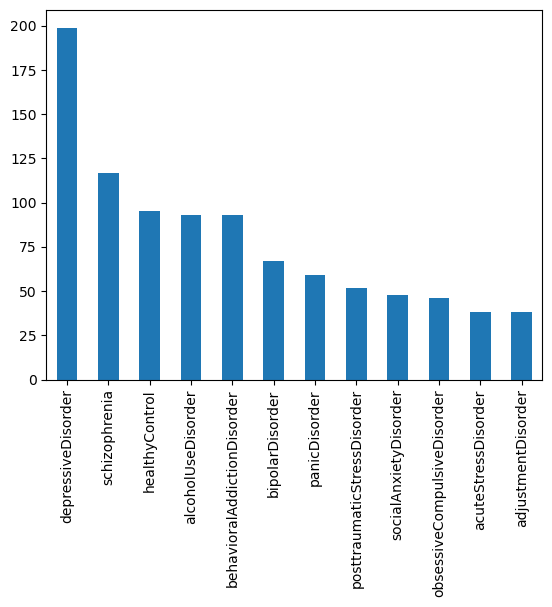

In [8]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

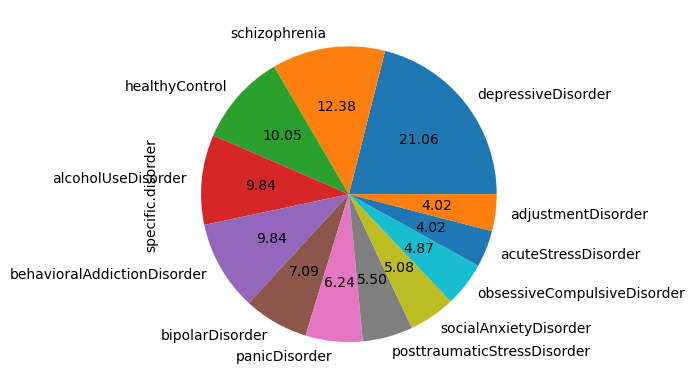

In [9]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [10]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'healthyControl':7,
    'obsessiveCompulsiveDisorder':8, 
    'panicDisorder':9,
    'posttraumaticStressDisorder':10, 
    'schizophrenia':11,
    'socialAnxietyDisorder':12
})

In [11]:
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,1,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,1,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,1,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,1,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,12,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,12,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,12,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,12,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [12]:
# Generating a correlation matrix
corr = eegDatasetCleaned.corr()

<Axes: >

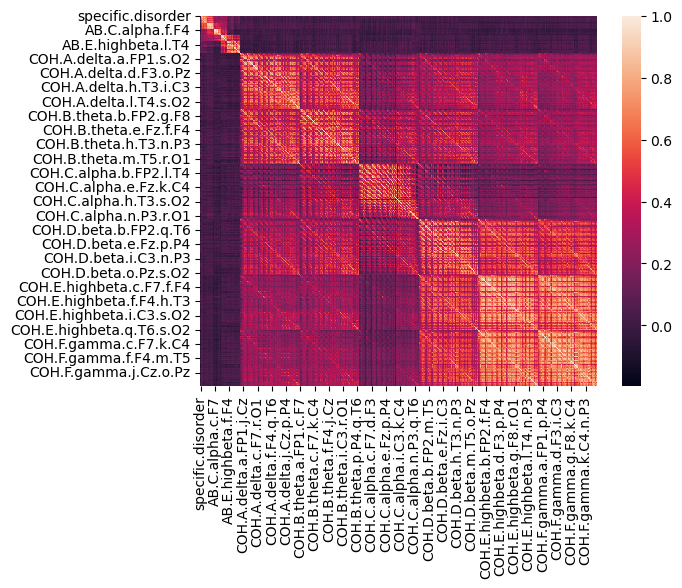

In [13]:
import seaborn as sns

# Generating a correlation heatmap to visually observe best correlations
sns.heatmap(corr)

In [14]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
xRes,yRes = rus.fit_resample(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'])

In [16]:
# Prints information about the EEG training smote dataset.
xRes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Columns: 1140 entries, AB.A.delta.a.FP1 to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140)
memory usage: 4.0 MB


In [17]:
# Prints information about the EEG true smote dataset.
yRes.info()

<class 'pandas.core.series.Series'>
RangeIndex: 456 entries, 0 to 455
Series name: specific.disorder
Non-Null Count  Dtype
--------------  -----
456 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [18]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRAINING DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG training dataset shape after smote: \n', xRes.shape)


 EEG TRAINING DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG training dataset shape after smote: 
 (456, 1140)


In [19]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG true value dataset shape after smote: \n', yRes.shape)


 EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG true value dataset shape after smote: 
 (456,)


<Axes: >

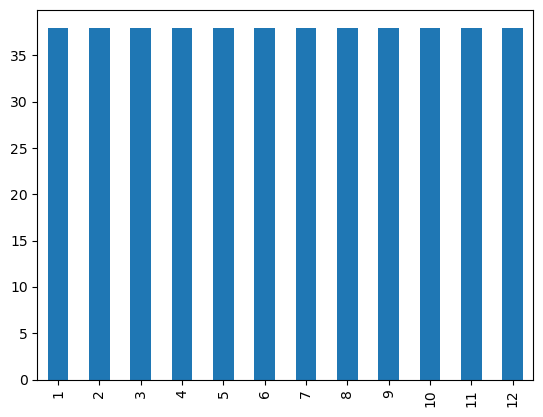

In [20]:
# Creating a visual plot to observe the y values after smote applied.
yRes.value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

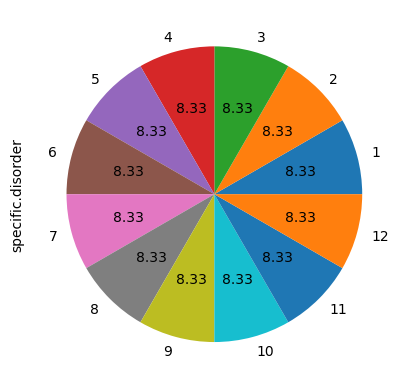

In [21]:
# Creating a visual plot to observe the unbalanced data.
yRes.value_counts().plot.pie(autopct='%.2f')

In [22]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(xRes, yRes, test_size=0.3, random_state=42)

In [23]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1500,
                           learning_rate=0.1,
                           depth=2)

In [24]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4726900	total: 286ms	remaining: 7m 8s
1:	learn: 2.4616787	total: 361ms	remaining: 4m 30s
2:	learn: 2.4552300	total: 438ms	remaining: 3m 38s
3:	learn: 2.4511073	total: 518ms	remaining: 3m 13s
4:	learn: 2.4435351	total: 598ms	remaining: 2m 58s
5:	learn: 2.4376831	total: 685ms	remaining: 2m 50s
6:	learn: 2.4294712	total: 765ms	remaining: 2m 43s
7:	learn: 2.4212151	total: 843ms	remaining: 2m 37s
8:	learn: 2.4155275	total: 919ms	remaining: 2m 32s
9:	learn: 2.4114231	total: 998ms	remaining: 2m 28s
10:	learn: 2.4035706	total: 1.08s	remaining: 2m 25s
11:	learn: 2.3961828	total: 1.15s	remaining: 2m 22s
12:	learn: 2.3941635	total: 1.24s	remaining: 2m 21s
13:	learn: 2.3877537	total: 1.32s	remaining: 2m 19s
14:	learn: 2.3769632	total: 1.4s	remaining: 2m 18s
15:	learn: 2.3721284	total: 1.49s	remaining: 2m 18s
16:	learn: 2.3638885	total: 1.57s	remaining: 2m 17s
17:	learn: 2.3551671	total: 1.66s	remaining: 2m 16s
18:	learn: 2.3490962	total: 1.74s	remaining: 2m 15s
19:	learn: 2.3441386	tot

159:	learn: 1.6822658	total: 12.7s	remaining: 1m 46s
160:	learn: 1.6813620	total: 12.7s	remaining: 1m 45s
161:	learn: 1.6725085	total: 12.8s	remaining: 1m 45s
162:	learn: 1.6679220	total: 12.9s	remaining: 1m 45s
163:	learn: 1.6638634	total: 13s	remaining: 1m 45s
164:	learn: 1.6571115	total: 13s	remaining: 1m 45s
165:	learn: 1.6562943	total: 13.1s	remaining: 1m 45s
166:	learn: 1.6537770	total: 13.2s	remaining: 1m 45s
167:	learn: 1.6520566	total: 13.3s	remaining: 1m 45s
168:	learn: 1.6469241	total: 13.4s	remaining: 1m 45s
169:	learn: 1.6462209	total: 13.4s	remaining: 1m 45s
170:	learn: 1.6444154	total: 13.5s	remaining: 1m 44s
171:	learn: 1.6436541	total: 13.6s	remaining: 1m 44s
172:	learn: 1.6397152	total: 13.7s	remaining: 1m 44s
173:	learn: 1.6373790	total: 13.7s	remaining: 1m 44s
174:	learn: 1.6366398	total: 13.8s	remaining: 1m 44s
175:	learn: 1.6352858	total: 13.9s	remaining: 1m 44s
176:	learn: 1.6331674	total: 14s	remaining: 1m 44s
177:	learn: 1.6292470	total: 14s	remaining: 1m 44s
1

315:	learn: 1.2776672	total: 24.6s	remaining: 1m 32s
316:	learn: 1.2719325	total: 24.7s	remaining: 1m 32s
317:	learn: 1.2695579	total: 24.8s	remaining: 1m 32s
318:	learn: 1.2674232	total: 24.9s	remaining: 1m 32s
319:	learn: 1.2669332	total: 24.9s	remaining: 1m 31s
320:	learn: 1.2644201	total: 25s	remaining: 1m 31s
321:	learn: 1.2624881	total: 25.1s	remaining: 1m 31s
322:	learn: 1.2594003	total: 25.2s	remaining: 1m 31s
323:	learn: 1.2586705	total: 25.2s	remaining: 1m 31s
324:	learn: 1.2574764	total: 25.3s	remaining: 1m 31s
325:	learn: 1.2571285	total: 25.4s	remaining: 1m 31s
326:	learn: 1.2566893	total: 25.5s	remaining: 1m 31s
327:	learn: 1.2529710	total: 25.5s	remaining: 1m 31s
328:	learn: 1.2514822	total: 25.6s	remaining: 1m 31s
329:	learn: 1.2499455	total: 25.7s	remaining: 1m 31s
330:	learn: 1.2490413	total: 25.8s	remaining: 1m 30s
331:	learn: 1.2472898	total: 25.8s	remaining: 1m 30s
332:	learn: 1.2443298	total: 25.9s	remaining: 1m 30s
333:	learn: 1.2428620	total: 26s	remaining: 1m 3

471:	learn: 1.0059038	total: 36.6s	remaining: 1m 19s
472:	learn: 1.0052498	total: 36.7s	remaining: 1m 19s
473:	learn: 1.0026822	total: 36.7s	remaining: 1m 19s
474:	learn: 1.0018640	total: 36.8s	remaining: 1m 19s
475:	learn: 1.0009239	total: 36.9s	remaining: 1m 19s
476:	learn: 0.9983462	total: 37s	remaining: 1m 19s
477:	learn: 0.9978219	total: 37.1s	remaining: 1m 19s
478:	learn: 0.9970603	total: 37.1s	remaining: 1m 19s
479:	learn: 0.9966378	total: 37.2s	remaining: 1m 19s
480:	learn: 0.9961081	total: 37.3s	remaining: 1m 18s
481:	learn: 0.9951249	total: 37.4s	remaining: 1m 18s
482:	learn: 0.9928491	total: 37.4s	remaining: 1m 18s
483:	learn: 0.9907911	total: 37.5s	remaining: 1m 18s
484:	learn: 0.9901450	total: 37.6s	remaining: 1m 18s
485:	learn: 0.9896751	total: 37.7s	remaining: 1m 18s
486:	learn: 0.9871498	total: 37.7s	remaining: 1m 18s
487:	learn: 0.9859250	total: 37.8s	remaining: 1m 18s
488:	learn: 0.9834500	total: 37.9s	remaining: 1m 18s
489:	learn: 0.9823228	total: 38s	remaining: 1m 1

627:	learn: 0.8053402	total: 48.9s	remaining: 1m 7s
628:	learn: 0.8048741	total: 49s	remaining: 1m 7s
629:	learn: 0.8031537	total: 49s	remaining: 1m 7s
630:	learn: 0.8029101	total: 49.1s	remaining: 1m 7s
631:	learn: 0.7983634	total: 49.2s	remaining: 1m 7s
632:	learn: 0.7966100	total: 49.3s	remaining: 1m 7s
633:	learn: 0.7960822	total: 49.3s	remaining: 1m 7s
634:	learn: 0.7955632	total: 49.4s	remaining: 1m 7s
635:	learn: 0.7941690	total: 49.5s	remaining: 1m 7s
636:	learn: 0.7932015	total: 49.6s	remaining: 1m 7s
637:	learn: 0.7929316	total: 49.6s	remaining: 1m 7s
638:	learn: 0.7922373	total: 49.7s	remaining: 1m 6s
639:	learn: 0.7915844	total: 49.8s	remaining: 1m 6s
640:	learn: 0.7905638	total: 49.9s	remaining: 1m 6s
641:	learn: 0.7903863	total: 50s	remaining: 1m 6s
642:	learn: 0.7900715	total: 50s	remaining: 1m 6s
643:	learn: 0.7881942	total: 50.1s	remaining: 1m 6s
644:	learn: 0.7875579	total: 50.2s	remaining: 1m 6s
645:	learn: 0.7861514	total: 50.3s	remaining: 1m 6s
646:	learn: 0.785700

789:	learn: 0.6483632	total: 1m 1s	remaining: 55s
790:	learn: 0.6480545	total: 1m 1s	remaining: 55s
791:	learn: 0.6476661	total: 1m 1s	remaining: 54.9s
792:	learn: 0.6472952	total: 1m 1s	remaining: 54.8s
793:	learn: 0.6450980	total: 1m 1s	remaining: 54.7s
794:	learn: 0.6430843	total: 1m 1s	remaining: 54.7s
795:	learn: 0.6424976	total: 1m 1s	remaining: 54.6s
796:	learn: 0.6416234	total: 1m 1s	remaining: 54.5s
797:	learn: 0.6407985	total: 1m 1s	remaining: 54.4s
798:	learn: 0.6394879	total: 1m 1s	remaining: 54.3s
799:	learn: 0.6390771	total: 1m 2s	remaining: 54.3s
800:	learn: 0.6387897	total: 1m 2s	remaining: 54.2s
801:	learn: 0.6385264	total: 1m 2s	remaining: 54.1s
802:	learn: 0.6376007	total: 1m 2s	remaining: 54s
803:	learn: 0.6357706	total: 1m 2s	remaining: 53.9s
804:	learn: 0.6355130	total: 1m 2s	remaining: 53.9s
805:	learn: 0.6350639	total: 1m 2s	remaining: 53.8s
806:	learn: 0.6347095	total: 1m 2s	remaining: 53.7s
807:	learn: 0.6327040	total: 1m 2s	remaining: 53.6s
808:	learn: 0.6325

948:	learn: 0.5400843	total: 1m 13s	remaining: 42.6s
949:	learn: 0.5397416	total: 1m 13s	remaining: 42.5s
950:	learn: 0.5395742	total: 1m 13s	remaining: 42.4s
951:	learn: 0.5384781	total: 1m 13s	remaining: 42.4s
952:	learn: 0.5381521	total: 1m 13s	remaining: 42.3s
953:	learn: 0.5379284	total: 1m 13s	remaining: 42.2s
954:	learn: 0.5376653	total: 1m 13s	remaining: 42.1s
955:	learn: 0.5365677	total: 1m 13s	remaining: 42s
956:	learn: 0.5359970	total: 1m 13s	remaining: 42s
957:	learn: 0.5343306	total: 1m 14s	remaining: 41.9s
958:	learn: 0.5338004	total: 1m 14s	remaining: 41.8s
959:	learn: 0.5336912	total: 1m 14s	remaining: 41.7s
960:	learn: 0.5335411	total: 1m 14s	remaining: 41.7s
961:	learn: 0.5332721	total: 1m 14s	remaining: 41.6s
962:	learn: 0.5329971	total: 1m 14s	remaining: 41.5s
963:	learn: 0.5326169	total: 1m 14s	remaining: 41.4s
964:	learn: 0.5324373	total: 1m 14s	remaining: 41.3s
965:	learn: 0.5311751	total: 1m 14s	remaining: 41.3s
966:	learn: 0.5308231	total: 1m 14s	remaining: 41.

1104:	learn: 0.4562783	total: 1m 25s	remaining: 30.5s
1105:	learn: 0.4560929	total: 1m 25s	remaining: 30.4s
1106:	learn: 0.4553642	total: 1m 25s	remaining: 30.3s
1107:	learn: 0.4552274	total: 1m 25s	remaining: 30.3s
1108:	learn: 0.4548895	total: 1m 25s	remaining: 30.2s
1109:	learn: 0.4545208	total: 1m 25s	remaining: 30.1s
1110:	learn: 0.4544075	total: 1m 25s	remaining: 30s
1111:	learn: 0.4542931	total: 1m 25s	remaining: 29.9s
1112:	learn: 0.4537018	total: 1m 25s	remaining: 29.9s
1113:	learn: 0.4534772	total: 1m 25s	remaining: 29.8s
1114:	learn: 0.4526948	total: 1m 26s	remaining: 29.7s
1115:	learn: 0.4525901	total: 1m 26s	remaining: 29.6s
1116:	learn: 0.4514339	total: 1m 26s	remaining: 29.6s
1117:	learn: 0.4506743	total: 1m 26s	remaining: 29.5s
1118:	learn: 0.4504709	total: 1m 26s	remaining: 29.4s
1119:	learn: 0.4495619	total: 1m 26s	remaining: 29.3s
1120:	learn: 0.4494527	total: 1m 26s	remaining: 29.2s
1121:	learn: 0.4486504	total: 1m 26s	remaining: 29.2s
1122:	learn: 0.4478445	total: 

1257:	learn: 0.3906415	total: 1m 37s	remaining: 18.7s
1258:	learn: 0.3904803	total: 1m 37s	remaining: 18.6s
1259:	learn: 0.3903234	total: 1m 37s	remaining: 18.5s
1260:	learn: 0.3902114	total: 1m 37s	remaining: 18.4s
1261:	learn: 0.3900133	total: 1m 37s	remaining: 18.4s
1262:	learn: 0.3897047	total: 1m 37s	remaining: 18.3s
1263:	learn: 0.3895860	total: 1m 37s	remaining: 18.2s
1264:	learn: 0.3894549	total: 1m 37s	remaining: 18.1s
1265:	learn: 0.3889270	total: 1m 37s	remaining: 18s
1266:	learn: 0.3887670	total: 1m 37s	remaining: 18s
1267:	learn: 0.3881824	total: 1m 37s	remaining: 17.9s
1268:	learn: 0.3880794	total: 1m 37s	remaining: 17.8s
1269:	learn: 0.3877177	total: 1m 37s	remaining: 17.7s
1270:	learn: 0.3876324	total: 1m 37s	remaining: 17.7s
1271:	learn: 0.3865213	total: 1m 38s	remaining: 17.6s
1272:	learn: 0.3864015	total: 1m 38s	remaining: 17.5s
1273:	learn: 0.3862858	total: 1m 38s	remaining: 17.4s
1274:	learn: 0.3862367	total: 1m 38s	remaining: 17.3s
1275:	learn: 0.3861335	total: 1m

1410:	learn: 0.3411415	total: 1m 48s	remaining: 6.87s
1411:	learn: 0.3410898	total: 1m 48s	remaining: 6.79s
1412:	learn: 0.3404596	total: 1m 49s	remaining: 6.71s
1413:	learn: 0.3399805	total: 1m 49s	remaining: 6.63s
1414:	learn: 0.3398854	total: 1m 49s	remaining: 6.56s
1415:	learn: 0.3397236	total: 1m 49s	remaining: 6.48s
1416:	learn: 0.3396250	total: 1m 49s	remaining: 6.4s
1417:	learn: 0.3393132	total: 1m 49s	remaining: 6.33s
1418:	learn: 0.3391824	total: 1m 49s	remaining: 6.25s
1419:	learn: 0.3391152	total: 1m 49s	remaining: 6.17s
1420:	learn: 0.3389113	total: 1m 49s	remaining: 6.09s
1421:	learn: 0.3387943	total: 1m 49s	remaining: 6.02s
1422:	learn: 0.3380323	total: 1m 49s	remaining: 5.94s
1423:	learn: 0.3373800	total: 1m 49s	remaining: 5.86s
1424:	learn: 0.3372984	total: 1m 49s	remaining: 5.79s
1425:	learn: 0.3367638	total: 1m 50s	remaining: 5.71s
1426:	learn: 0.3366295	total: 1m 50s	remaining: 5.63s
1427:	learn: 0.3365345	total: 1m 50s	remaining: 5.55s
1428:	learn: 0.3364594	total:

In [25]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.1678832116788321

In [26]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[10],
       [ 7],
       [10],
       [ 7],
       [ 8],
       [ 7],
       [ 5],
       [ 6],
       [11],
       [ 9],
       [ 9],
       [ 5],
       [ 5],
       [ 9],
       [ 9],
       [ 9],
       [ 5],
       [ 9],
       [ 9],
       [10],
       [10],
       [ 4],
       [10],
       [11],
       [ 9],
       [ 4],
       [ 3],
       [ 6],
       [11],
       [10],
       [ 2],
       [ 5],
       [12],
       [10],
       [ 4],
       [ 7],
       [10],
       [ 9],
       [ 5],
       [ 9],
       [ 4],
       [ 6],
       [ 5],
       [ 6],
       [ 5],
       [ 8],
       [ 7],
       [ 9],
       [ 5],
       [10],
       [11],
       [ 7],
       [ 5],
       [ 4],
       [ 9],
       [12],
       [ 4],
       [ 3],
       [10],
       [ 2],
       [ 7],
       [ 5],
       [ 4],
       [ 5],
       [ 6],
       [ 6],
       [ 3],
       [ 9],
       [ 9],
       [ 6],
       [ 9],
       [ 4],
       [11],
       [ 8],
       [ 1],
       [ 5],
       [ 2],

In [27]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[1, 1, 2, 4, 1, 1, 2, 0, 2, 2, 2, 1],
       [0, 1, 0, 1, 1, 2, 2, 1, 3, 1, 1, 1],
       [0, 1, 1, 2, 0, 2, 1, 1, 2, 3, 0, 0],
       [0, 0, 0, 3, 2, 0, 1, 0, 0, 0, 2, 0],
       [2, 1, 1, 0, 4, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 2, 0, 0, 1, 2, 0, 3, 1, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 1, 3, 4, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0],
       [0, 0, 1, 2, 0, 1, 0, 2, 3, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 1, 0, 5, 1, 2, 0],
       [0, 1, 0, 2, 3, 4, 0, 0, 1, 0, 1, 6]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

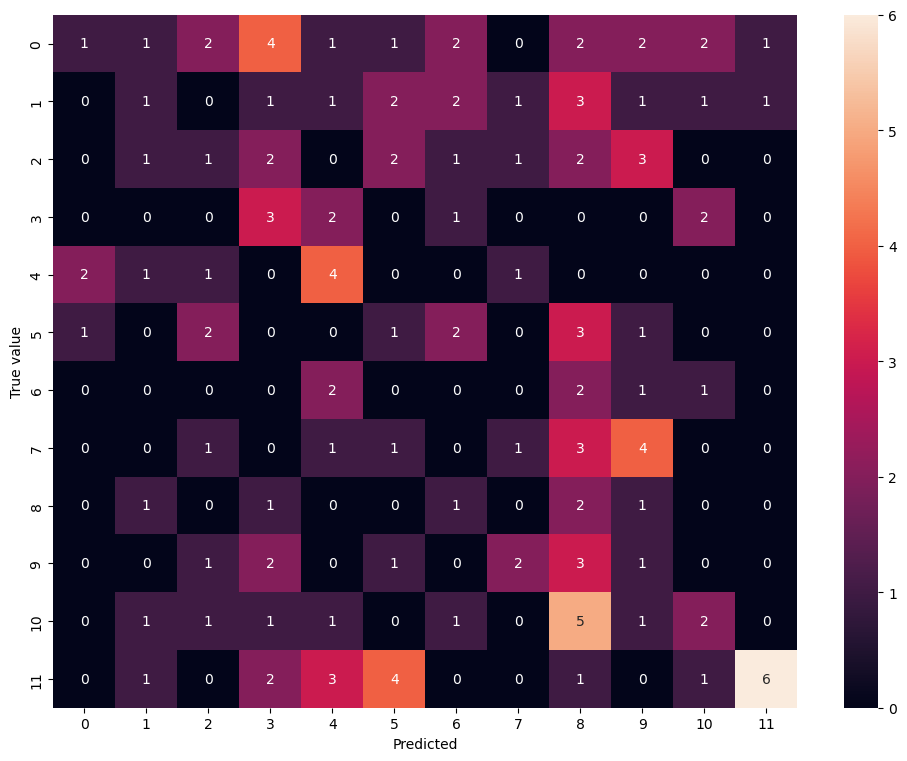

In [28]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (8,10) with 5 incorrect classifications represents how panic disorders were mis classes often.

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [29]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.25      0.05      0.09        19
           2       0.14      0.07      0.10        14
           3       0.11      0.08      0.09        13
           4       0.19      0.38      0.25         8
           5       0.27      0.44      0.33         9
           6       0.08      0.10      0.09        10
           7       0.00      0.00      0.00         6
           8       0.17      0.09      0.12        11
           9       0.08      0.33      0.12         6
          10       0.07      0.10      0.08        10
          11       0.22      0.15      0.18        13
          12       0.75      0.33      0.46        18

    accuracy                           0.17       137
   macro avg       0.19      0.18      0.16       137
weighted avg       0.24      0.17      0.17       137



In [30]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


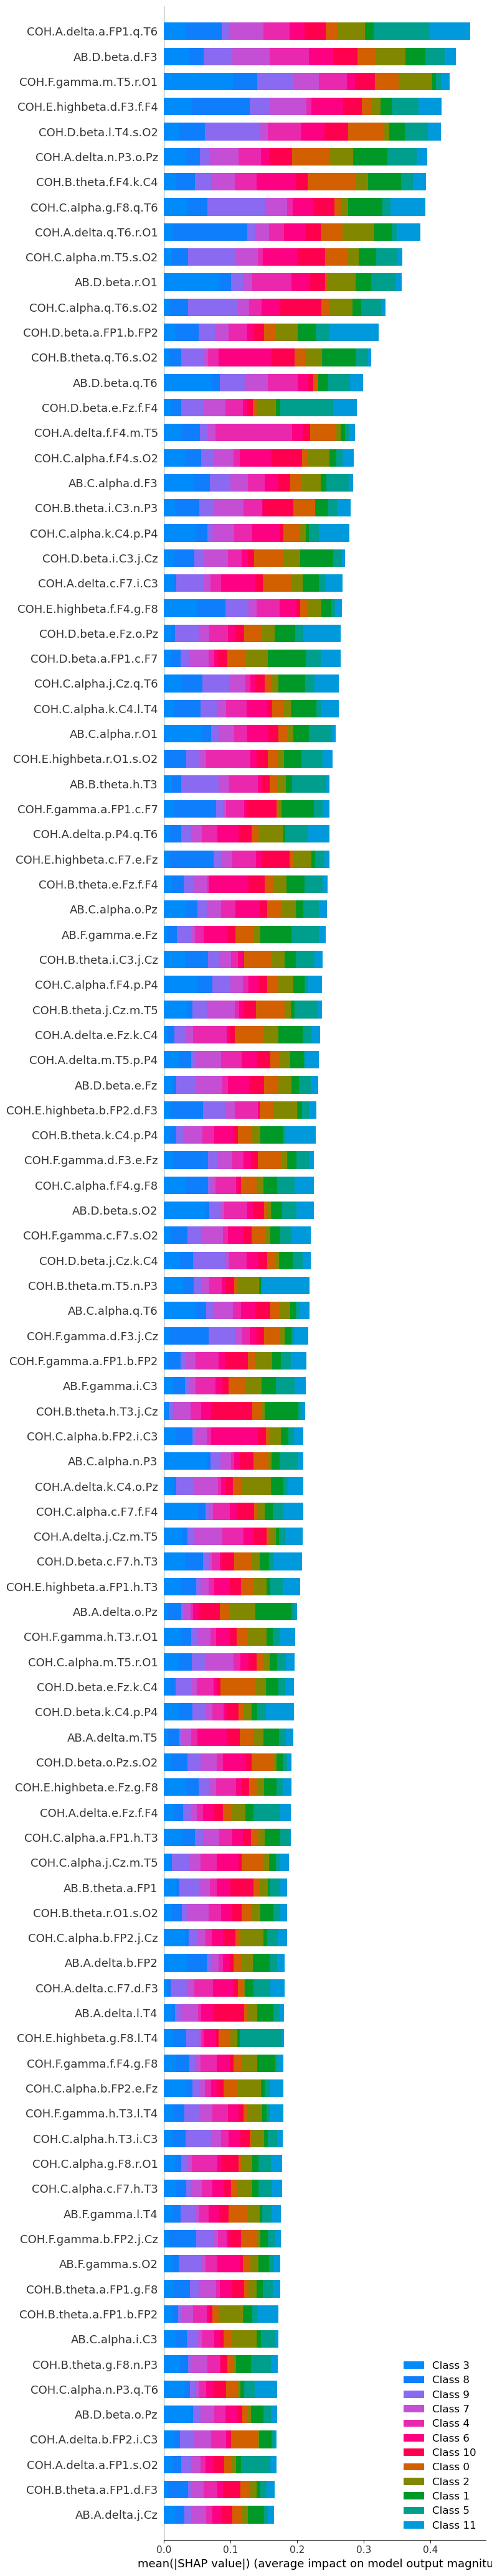

In [31]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 100)


In [34]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

,col_name,feature_importance_vals
129,COH.A.delta.a.FP1.q.T6,5.252308
60,AB.D.beta.d.F3,5.006438
1123,COH.F.gamma.m.T5.r.O1,4.897663
850,COH.E.highbeta.d.F3.f.F4,4.752622
776,COH.D.beta.l.T4.s.O2,4.745004
...,...,...
245,COH.A.delta.j.Cz.p.P4,0.000000
239,COH.A.delta.i.C3.s.O2,0.000000
931,COH.E.highbeta.j.Cz.r.O1,0.000000
930,COH.E.highbeta.j.Cz.q.T6,0.000000


In [35]:
# Below I am retrieving the 10 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(10)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['COH.A.delta.a.FP1.q.T6',
 'AB.D.beta.d.F3',
 'COH.F.gamma.m.T5.r.O1',
 'COH.E.highbeta.d.F3.f.F4',
 'COH.D.beta.l.T4.s.O2',
 'COH.A.delta.n.P3.o.Pz',
 'COH.B.theta.f.F4.k.C4',
 'COH.C.alpha.g.F8.q.T6',
 'COH.A.delta.q.T6.r.O1',
 'COH.C.alpha.m.T5.s.O2']

In [36]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

,COH.A.delta.a.FP1.q.T6,AB.D.beta.d.F3,COH.F.gamma.m.T5.r.O1,COH.E.highbeta.d.F3.f.F4,COH.D.beta.l.T4.s.O2,COH.A.delta.n.P3.o.Pz,COH.B.theta.f.F4.k.C4,COH.C.alpha.g.F8.q.T6,COH.A.delta.q.T6.r.O1,COH.C.alpha.m.T5.s.O2
0,0.889318,16.276273,26.686268,20.339402,5.413375,31.406563,68.309913,19.540393,2.149012,1.351032
1,1.567139,20.429403,54.199960,40.167130,9.499094,42.965825,72.396878,16.509707,17.109119,11.620080
2,0.398595,14.754415,47.662595,46.260421,15.751127,44.720665,64.398315,6.964353,7.923487,30.660272
3,9.125087,33.145163,71.414784,57.626263,32.272821,52.363971,55.592230,21.524375,9.035528,22.746099
4,19.893903,6.483243,78.289457,83.642545,25.477507,12.507506,51.494637,22.738287,15.129463,32.042838
...,...,...,...,...,...,...,...,...,...,...
940,7.084291,17.074610,62.622152,67.389698,27.929802,79.018011,79.195820,19.094883,42.768542,44.333768
941,59.917155,7.125193,64.555537,93.585404,95.076075,92.862865,92.010498,24.969558,91.469273,15.682816
942,1.114521,6.013054,81.232952,39.441887,3.063919,70.389210,68.852808,40.807412,22.351596,16.896239
943,4.443726,11.476164,39.315296,70.299600,9.693806,32.822905,76.450190,31.843191,10.096288,53.020050


In [37]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [38]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.11,
                           depth=2)

In [39]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4512809	total: 2.85ms	remaining: 14.2s
1:	learn: 2.4221204	total: 4.96ms	remaining: 12.4s
2:	learn: 2.4005766	total: 6.79ms	remaining: 11.3s
3:	learn: 2.3827220	total: 8.65ms	remaining: 10.8s
4:	learn: 2.3646835	total: 10.6ms	remaining: 10.5s
5:	learn: 2.3496833	total: 12.5ms	remaining: 10.4s
6:	learn: 2.3384975	total: 14.3ms	remaining: 10.2s
7:	learn: 2.3282471	total: 16.2ms	remaining: 10.1s
8:	learn: 2.3191127	total: 18.1ms	remaining: 10s
9:	learn: 2.3140400	total: 19.9ms	remaining: 9.93s
10:	learn: 2.3090711	total: 21.8ms	remaining: 9.87s
11:	learn: 2.3007996	total: 23.6ms	remaining: 9.79s
12:	learn: 2.2947814	total: 25.4ms	remaining: 9.74s
13:	learn: 2.2878425	total: 27.2ms	remaining: 9.68s
14:	learn: 2.2808601	total: 29.1ms	remaining: 9.66s
15:	learn: 2.2755166	total: 30.9ms	remaining: 9.62s
16:	learn: 2.2713103	total: 32.7ms	remaining: 9.59s
17:	learn: 2.2661098	total: 34.6ms	remaining: 9.57s
18:	learn: 2.2599144	total: 36.4ms	remaining: 9.54s
19:	learn: 2.2552113	tot

198:	learn: 1.9042745	total: 385ms	remaining: 9.29s
199:	learn: 1.9037416	total: 387ms	remaining: 9.29s
200:	learn: 1.9031624	total: 389ms	remaining: 9.3s
201:	learn: 1.9018101	total: 391ms	remaining: 9.29s
202:	learn: 1.9005647	total: 393ms	remaining: 9.29s
203:	learn: 1.8996635	total: 395ms	remaining: 9.3s
204:	learn: 1.8983311	total: 397ms	remaining: 9.29s
205:	learn: 1.8963510	total: 399ms	remaining: 9.29s
206:	learn: 1.8947803	total: 401ms	remaining: 9.29s
207:	learn: 1.8937537	total: 403ms	remaining: 9.29s
208:	learn: 1.8922271	total: 406ms	remaining: 9.3s
209:	learn: 1.8905424	total: 408ms	remaining: 9.31s
210:	learn: 1.8901231	total: 410ms	remaining: 9.31s
211:	learn: 1.8894110	total: 412ms	remaining: 9.3s
212:	learn: 1.8882797	total: 414ms	remaining: 9.3s
213:	learn: 1.8852654	total: 416ms	remaining: 9.3s
214:	learn: 1.8842316	total: 418ms	remaining: 9.29s
215:	learn: 1.8828004	total: 420ms	remaining: 9.3s
216:	learn: 1.8820594	total: 422ms	remaining: 9.29s
217:	learn: 1.88133

397:	learn: 1.6737268	total: 766ms	remaining: 8.85s
398:	learn: 1.6722857	total: 768ms	remaining: 8.86s
399:	learn: 1.6711449	total: 770ms	remaining: 8.86s
400:	learn: 1.6707061	total: 772ms	remaining: 8.86s
401:	learn: 1.6704793	total: 775ms	remaining: 8.86s
402:	learn: 1.6690111	total: 777ms	remaining: 8.86s
403:	learn: 1.6683780	total: 779ms	remaining: 8.86s
404:	learn: 1.6676718	total: 781ms	remaining: 8.86s
405:	learn: 1.6672731	total: 783ms	remaining: 8.86s
406:	learn: 1.6659998	total: 785ms	remaining: 8.86s
407:	learn: 1.6632652	total: 787ms	remaining: 8.86s
408:	learn: 1.6627812	total: 789ms	remaining: 8.85s
409:	learn: 1.6621281	total: 791ms	remaining: 8.85s
410:	learn: 1.6614069	total: 793ms	remaining: 8.86s
411:	learn: 1.6610021	total: 795ms	remaining: 8.85s
412:	learn: 1.6603537	total: 797ms	remaining: 8.85s
413:	learn: 1.6597306	total: 799ms	remaining: 8.85s
414:	learn: 1.6571677	total: 801ms	remaining: 8.85s
415:	learn: 1.6567215	total: 803ms	remaining: 8.85s
416:	learn: 

601:	learn: 1.5010730	total: 1.15s	remaining: 8.4s
602:	learn: 1.5007214	total: 1.15s	remaining: 8.4s
603:	learn: 1.5003455	total: 1.15s	remaining: 8.4s
604:	learn: 1.4998669	total: 1.16s	remaining: 8.4s
605:	learn: 1.4987933	total: 1.16s	remaining: 8.4s
606:	learn: 1.4973952	total: 1.16s	remaining: 8.39s
607:	learn: 1.4967579	total: 1.16s	remaining: 8.39s
608:	learn: 1.4950687	total: 1.16s	remaining: 8.39s
609:	learn: 1.4945711	total: 1.17s	remaining: 8.39s
610:	learn: 1.4942125	total: 1.17s	remaining: 8.39s
611:	learn: 1.4937593	total: 1.17s	remaining: 8.39s
612:	learn: 1.4929169	total: 1.17s	remaining: 8.39s
613:	learn: 1.4913101	total: 1.17s	remaining: 8.38s
614:	learn: 1.4908809	total: 1.18s	remaining: 8.38s
615:	learn: 1.4897933	total: 1.18s	remaining: 8.38s
616:	learn: 1.4891609	total: 1.18s	remaining: 8.38s
617:	learn: 1.4884304	total: 1.18s	remaining: 8.38s
618:	learn: 1.4878873	total: 1.18s	remaining: 8.37s
619:	learn: 1.4864731	total: 1.18s	remaining: 8.37s
620:	learn: 1.485

806:	learn: 1.3505089	total: 1.53s	remaining: 7.98s
807:	learn: 1.3503285	total: 1.54s	remaining: 7.98s
808:	learn: 1.3497129	total: 1.54s	remaining: 7.97s
809:	learn: 1.3488291	total: 1.54s	remaining: 7.97s
810:	learn: 1.3484722	total: 1.54s	remaining: 7.97s
811:	learn: 1.3482519	total: 1.54s	remaining: 7.97s
812:	learn: 1.3476389	total: 1.55s	remaining: 7.97s
813:	learn: 1.3465329	total: 1.55s	remaining: 7.97s
814:	learn: 1.3450837	total: 1.55s	remaining: 7.97s
815:	learn: 1.3447647	total: 1.55s	remaining: 7.96s
816:	learn: 1.3444463	total: 1.55s	remaining: 7.96s
817:	learn: 1.3442397	total: 1.56s	remaining: 7.96s
818:	learn: 1.3437339	total: 1.56s	remaining: 7.96s
819:	learn: 1.3433429	total: 1.56s	remaining: 7.96s
820:	learn: 1.3427534	total: 1.56s	remaining: 7.95s
821:	learn: 1.3413688	total: 1.56s	remaining: 7.95s
822:	learn: 1.3401905	total: 1.57s	remaining: 7.95s
823:	learn: 1.3398551	total: 1.57s	remaining: 7.95s
824:	learn: 1.3392198	total: 1.57s	remaining: 7.95s
825:	learn: 

1011:	learn: 1.2096983	total: 1.92s	remaining: 7.56s
1012:	learn: 1.2094671	total: 1.92s	remaining: 7.56s
1013:	learn: 1.2089829	total: 1.92s	remaining: 7.56s
1014:	learn: 1.2086506	total: 1.93s	remaining: 7.56s
1015:	learn: 1.2083237	total: 1.93s	remaining: 7.56s
1016:	learn: 1.2077715	total: 1.93s	remaining: 7.56s
1017:	learn: 1.2069304	total: 1.93s	remaining: 7.56s
1018:	learn: 1.2064046	total: 1.93s	remaining: 7.55s
1019:	learn: 1.2062623	total: 1.94s	remaining: 7.55s
1020:	learn: 1.2049756	total: 1.94s	remaining: 7.55s
1021:	learn: 1.2046281	total: 1.94s	remaining: 7.55s
1022:	learn: 1.2038988	total: 1.94s	remaining: 7.55s
1023:	learn: 1.2024431	total: 1.94s	remaining: 7.55s
1024:	learn: 1.2004417	total: 1.95s	remaining: 7.55s
1025:	learn: 1.1993498	total: 1.95s	remaining: 7.54s
1026:	learn: 1.1988889	total: 1.95s	remaining: 7.54s
1027:	learn: 1.1986710	total: 1.95s	remaining: 7.54s
1028:	learn: 1.1981714	total: 1.95s	remaining: 7.54s
1029:	learn: 1.1978426	total: 1.96s	remaining:

1215:	learn: 1.0863020	total: 2.3s	remaining: 7.17s
1216:	learn: 1.0860692	total: 2.31s	remaining: 7.17s
1217:	learn: 1.0847379	total: 2.31s	remaining: 7.16s
1218:	learn: 1.0844659	total: 2.31s	remaining: 7.16s
1219:	learn: 1.0841764	total: 2.31s	remaining: 7.16s
1220:	learn: 1.0837659	total: 2.31s	remaining: 7.16s
1221:	learn: 1.0831253	total: 2.31s	remaining: 7.16s
1222:	learn: 1.0827923	total: 2.32s	remaining: 7.16s
1223:	learn: 1.0816541	total: 2.32s	remaining: 7.15s
1224:	learn: 1.0811870	total: 2.32s	remaining: 7.15s
1225:	learn: 1.0806928	total: 2.32s	remaining: 7.15s
1226:	learn: 1.0803946	total: 2.33s	remaining: 7.15s
1227:	learn: 1.0798705	total: 2.33s	remaining: 7.15s
1228:	learn: 1.0796242	total: 2.33s	remaining: 7.15s
1229:	learn: 1.0783776	total: 2.33s	remaining: 7.14s
1230:	learn: 1.0781530	total: 2.33s	remaining: 7.14s
1231:	learn: 1.0770064	total: 2.33s	remaining: 7.14s
1232:	learn: 1.0762296	total: 2.34s	remaining: 7.14s
1233:	learn: 1.0757985	total: 2.34s	remaining: 

1417:	learn: 0.9662347	total: 2.69s	remaining: 6.79s
1418:	learn: 0.9660602	total: 2.69s	remaining: 6.79s
1419:	learn: 0.9655135	total: 2.69s	remaining: 6.79s
1420:	learn: 0.9647447	total: 2.69s	remaining: 6.79s
1421:	learn: 0.9633724	total: 2.7s	remaining: 6.78s
1422:	learn: 0.9626196	total: 2.7s	remaining: 6.78s
1423:	learn: 0.9624414	total: 2.7s	remaining: 6.78s
1424:	learn: 0.9614283	total: 2.7s	remaining: 6.78s
1425:	learn: 0.9600268	total: 2.7s	remaining: 6.78s
1426:	learn: 0.9594772	total: 2.71s	remaining: 6.78s
1427:	learn: 0.9592388	total: 2.71s	remaining: 6.77s
1428:	learn: 0.9588729	total: 2.71s	remaining: 6.77s
1429:	learn: 0.9585762	total: 2.71s	remaining: 6.77s
1430:	learn: 0.9577982	total: 2.71s	remaining: 6.77s
1431:	learn: 0.9566539	total: 2.72s	remaining: 6.77s
1432:	learn: 0.9564233	total: 2.72s	remaining: 6.76s
1433:	learn: 0.9560284	total: 2.72s	remaining: 6.76s
1434:	learn: 0.9553775	total: 2.72s	remaining: 6.76s
1435:	learn: 0.9548279	total: 2.72s	remaining: 6.76

1624:	learn: 0.8698570	total: 3.07s	remaining: 6.38s
1625:	learn: 0.8691129	total: 3.07s	remaining: 6.38s
1626:	learn: 0.8683383	total: 3.08s	remaining: 6.38s
1627:	learn: 0.8675981	total: 3.08s	remaining: 6.37s
1628:	learn: 0.8674298	total: 3.08s	remaining: 6.37s
1629:	learn: 0.8669617	total: 3.08s	remaining: 6.37s
1630:	learn: 0.8667128	total: 3.08s	remaining: 6.37s
1631:	learn: 0.8664959	total: 3.08s	remaining: 6.37s
1632:	learn: 0.8659271	total: 3.09s	remaining: 6.37s
1633:	learn: 0.8657379	total: 3.09s	remaining: 6.36s
1634:	learn: 0.8646379	total: 3.09s	remaining: 6.36s
1635:	learn: 0.8644663	total: 3.09s	remaining: 6.36s
1636:	learn: 0.8640779	total: 3.1s	remaining: 6.36s
1637:	learn: 0.8636995	total: 3.1s	remaining: 6.36s
1638:	learn: 0.8631031	total: 3.1s	remaining: 6.36s
1639:	learn: 0.8627411	total: 3.1s	remaining: 6.35s
1640:	learn: 0.8624763	total: 3.1s	remaining: 6.35s
1641:	learn: 0.8618749	total: 3.1s	remaining: 6.35s
1642:	learn: 0.8613560	total: 3.11s	remaining: 6.35s

1826:	learn: 0.7874506	total: 3.46s	remaining: 6s
1827:	learn: 0.7866099	total: 3.46s	remaining: 6s
1828:	learn: 0.7863945	total: 3.46s	remaining: 6s
1829:	learn: 0.7862032	total: 3.46s	remaining: 6s
1830:	learn: 0.7859019	total: 3.46s	remaining: 6s
1831:	learn: 0.7853179	total: 3.47s	remaining: 5.99s
1832:	learn: 0.7850701	total: 3.47s	remaining: 5.99s
1833:	learn: 0.7847276	total: 3.47s	remaining: 5.99s
1834:	learn: 0.7844847	total: 3.47s	remaining: 5.99s
1835:	learn: 0.7843580	total: 3.47s	remaining: 5.99s
1836:	learn: 0.7839606	total: 3.48s	remaining: 5.98s
1837:	learn: 0.7832522	total: 3.48s	remaining: 5.98s
1838:	learn: 0.7822933	total: 3.48s	remaining: 5.98s
1839:	learn: 0.7819604	total: 3.48s	remaining: 5.98s
1840:	learn: 0.7818087	total: 3.48s	remaining: 5.98s
1841:	learn: 0.7808923	total: 3.48s	remaining: 5.97s
1842:	learn: 0.7807693	total: 3.49s	remaining: 5.97s
1843:	learn: 0.7800172	total: 3.49s	remaining: 5.97s
1844:	learn: 0.7798625	total: 3.49s	remaining: 5.97s
1845:	le

2023:	learn: 0.7154526	total: 3.84s	remaining: 5.64s
2024:	learn: 0.7151397	total: 3.84s	remaining: 5.64s
2025:	learn: 0.7148909	total: 3.84s	remaining: 5.64s
2026:	learn: 0.7144605	total: 3.85s	remaining: 5.64s
2027:	learn: 0.7142629	total: 3.85s	remaining: 5.64s
2028:	learn: 0.7140218	total: 3.85s	remaining: 5.64s
2029:	learn: 0.7139855	total: 3.85s	remaining: 5.63s
2030:	learn: 0.7133111	total: 3.85s	remaining: 5.63s
2031:	learn: 0.7129670	total: 3.85s	remaining: 5.63s
2032:	learn: 0.7124356	total: 3.86s	remaining: 5.63s
2033:	learn: 0.7120210	total: 3.86s	remaining: 5.63s
2034:	learn: 0.7116168	total: 3.86s	remaining: 5.63s
2035:	learn: 0.7115086	total: 3.86s	remaining: 5.62s
2036:	learn: 0.7113543	total: 3.87s	remaining: 5.62s
2037:	learn: 0.7110535	total: 3.87s	remaining: 5.62s
2038:	learn: 0.7106686	total: 3.87s	remaining: 5.62s
2039:	learn: 0.7103906	total: 3.87s	remaining: 5.62s
2040:	learn: 0.7102535	total: 3.87s	remaining: 5.62s
2041:	learn: 0.7100137	total: 3.88s	remaining:

2218:	learn: 0.6519473	total: 4.22s	remaining: 5.29s
2219:	learn: 0.6517999	total: 4.23s	remaining: 5.29s
2220:	learn: 0.6514037	total: 4.23s	remaining: 5.29s
2221:	learn: 0.6512925	total: 4.23s	remaining: 5.29s
2222:	learn: 0.6506149	total: 4.23s	remaining: 5.29s
2223:	learn: 0.6501424	total: 4.23s	remaining: 5.28s
2224:	learn: 0.6498717	total: 4.24s	remaining: 5.28s
2225:	learn: 0.6497484	total: 4.24s	remaining: 5.28s
2226:	learn: 0.6495721	total: 4.24s	remaining: 5.28s
2227:	learn: 0.6494581	total: 4.24s	remaining: 5.28s
2228:	learn: 0.6490596	total: 4.24s	remaining: 5.28s
2229:	learn: 0.6487108	total: 4.25s	remaining: 5.27s
2230:	learn: 0.6485290	total: 4.25s	remaining: 5.27s
2231:	learn: 0.6481555	total: 4.25s	remaining: 5.27s
2232:	learn: 0.6480695	total: 4.25s	remaining: 5.27s
2233:	learn: 0.6477463	total: 4.25s	remaining: 5.26s
2234:	learn: 0.6472993	total: 4.25s	remaining: 5.26s
2235:	learn: 0.6470445	total: 4.26s	remaining: 5.26s
2236:	learn: 0.6469047	total: 4.26s	remaining:

2423:	learn: 0.5834992	total: 4.61s	remaining: 4.9s
2424:	learn: 0.5830132	total: 4.61s	remaining: 4.89s
2425:	learn: 0.5828914	total: 4.61s	remaining: 4.89s
2426:	learn: 0.5826976	total: 4.61s	remaining: 4.89s
2427:	learn: 0.5822564	total: 4.62s	remaining: 4.89s
2428:	learn: 0.5816438	total: 4.62s	remaining: 4.89s
2429:	learn: 0.5815005	total: 4.62s	remaining: 4.88s
2430:	learn: 0.5808530	total: 4.62s	remaining: 4.88s
2431:	learn: 0.5806092	total: 4.62s	remaining: 4.88s
2432:	learn: 0.5805112	total: 4.63s	remaining: 4.88s
2433:	learn: 0.5803043	total: 4.63s	remaining: 4.88s
2434:	learn: 0.5798733	total: 4.63s	remaining: 4.88s
2435:	learn: 0.5797104	total: 4.63s	remaining: 4.87s
2436:	learn: 0.5796010	total: 4.63s	remaining: 4.87s
2437:	learn: 0.5793090	total: 4.63s	remaining: 4.87s
2438:	learn: 0.5791758	total: 4.64s	remaining: 4.87s
2439:	learn: 0.5791096	total: 4.64s	remaining: 4.87s
2440:	learn: 0.5789522	total: 4.64s	remaining: 4.86s
2441:	learn: 0.5788391	total: 4.64s	remaining: 

2629:	learn: 0.5310825	total: 4.99s	remaining: 4.5s
2630:	learn: 0.5309777	total: 4.99s	remaining: 4.5s
2631:	learn: 0.5308267	total: 5s	remaining: 4.5s
2632:	learn: 0.5304984	total: 5s	remaining: 4.49s
2633:	learn: 0.5303629	total: 5s	remaining: 4.49s
2634:	learn: 0.5300168	total: 5s	remaining: 4.49s
2635:	learn: 0.5295794	total: 5s	remaining: 4.49s
2636:	learn: 0.5294045	total: 5.01s	remaining: 4.49s
2637:	learn: 0.5289876	total: 5.01s	remaining: 4.48s
2638:	learn: 0.5288000	total: 5.01s	remaining: 4.48s
2639:	learn: 0.5286629	total: 5.01s	remaining: 4.48s
2640:	learn: 0.5283218	total: 5.01s	remaining: 4.48s
2641:	learn: 0.5281835	total: 5.01s	remaining: 4.48s
2642:	learn: 0.5280166	total: 5.02s	remaining: 4.47s
2643:	learn: 0.5279406	total: 5.02s	remaining: 4.47s
2644:	learn: 0.5276640	total: 5.02s	remaining: 4.47s
2645:	learn: 0.5270441	total: 5.02s	remaining: 4.47s
2646:	learn: 0.5269079	total: 5.03s	remaining: 4.47s
2647:	learn: 0.5267937	total: 5.03s	remaining: 4.46s
2648:	learn

2826:	learn: 0.4872951	total: 5.38s	remaining: 4.13s
2827:	learn: 0.4872253	total: 5.38s	remaining: 4.13s
2828:	learn: 0.4871240	total: 5.38s	remaining: 4.13s
2829:	learn: 0.4868196	total: 5.38s	remaining: 4.13s
2830:	learn: 0.4863576	total: 5.38s	remaining: 4.13s
2831:	learn: 0.4859757	total: 5.39s	remaining: 4.12s
2832:	learn: 0.4856761	total: 5.39s	remaining: 4.12s
2833:	learn: 0.4853556	total: 5.39s	remaining: 4.12s
2834:	learn: 0.4852669	total: 5.39s	remaining: 4.12s
2835:	learn: 0.4851582	total: 5.39s	remaining: 4.12s
2836:	learn: 0.4850309	total: 5.4s	remaining: 4.12s
2837:	learn: 0.4849148	total: 5.4s	remaining: 4.12s
2838:	learn: 0.4845129	total: 5.41s	remaining: 4.12s
2839:	learn: 0.4842079	total: 5.41s	remaining: 4.11s
2840:	learn: 0.4837921	total: 5.41s	remaining: 4.11s
2841:	learn: 0.4831555	total: 5.41s	remaining: 4.11s
2842:	learn: 0.4826055	total: 5.42s	remaining: 4.11s
2843:	learn: 0.4824860	total: 5.42s	remaining: 4.11s
2844:	learn: 0.4820555	total: 5.42s	remaining: 4

3020:	learn: 0.4451312	total: 5.76s	remaining: 3.77s
3021:	learn: 0.4450254	total: 5.76s	remaining: 3.77s
3022:	learn: 0.4449304	total: 5.76s	remaining: 3.77s
3023:	learn: 0.4447997	total: 5.76s	remaining: 3.77s
3024:	learn: 0.4445232	total: 5.77s	remaining: 3.77s
3025:	learn: 0.4444495	total: 5.77s	remaining: 3.76s
3026:	learn: 0.4442384	total: 5.77s	remaining: 3.76s
3027:	learn: 0.4438103	total: 5.77s	remaining: 3.76s
3028:	learn: 0.4435123	total: 5.78s	remaining: 3.76s
3029:	learn: 0.4434329	total: 5.78s	remaining: 3.76s
3030:	learn: 0.4433853	total: 5.78s	remaining: 3.75s
3031:	learn: 0.4433143	total: 5.78s	remaining: 3.75s
3032:	learn: 0.4431759	total: 5.78s	remaining: 3.75s
3033:	learn: 0.4430060	total: 5.79s	remaining: 3.75s
3034:	learn: 0.4428768	total: 5.79s	remaining: 3.75s
3035:	learn: 0.4428444	total: 5.79s	remaining: 3.75s
3036:	learn: 0.4425708	total: 5.79s	remaining: 3.74s
3037:	learn: 0.4424575	total: 5.79s	remaining: 3.74s
3038:	learn: 0.4422886	total: 5.8s	remaining: 

3220:	learn: 0.4093919	total: 6.14s	remaining: 3.39s
3221:	learn: 0.4092176	total: 6.15s	remaining: 3.39s
3222:	learn: 0.4088921	total: 6.15s	remaining: 3.39s
3223:	learn: 0.4088254	total: 6.15s	remaining: 3.39s
3224:	learn: 0.4087584	total: 6.15s	remaining: 3.39s
3225:	learn: 0.4086091	total: 6.15s	remaining: 3.38s
3226:	learn: 0.4084529	total: 6.16s	remaining: 3.38s
3227:	learn: 0.4083948	total: 6.16s	remaining: 3.38s
3228:	learn: 0.4081680	total: 6.16s	remaining: 3.38s
3229:	learn: 0.4077459	total: 6.16s	remaining: 3.38s
3230:	learn: 0.4076793	total: 6.16s	remaining: 3.38s
3231:	learn: 0.4075753	total: 6.17s	remaining: 3.37s
3232:	learn: 0.4072114	total: 6.17s	remaining: 3.37s
3233:	learn: 0.4070085	total: 6.17s	remaining: 3.37s
3234:	learn: 0.4069497	total: 6.17s	remaining: 3.37s
3235:	learn: 0.4066855	total: 6.18s	remaining: 3.37s
3236:	learn: 0.4066040	total: 6.18s	remaining: 3.37s
3237:	learn: 0.4065363	total: 6.18s	remaining: 3.36s
3238:	learn: 0.4063474	total: 6.18s	remaining:

3420:	learn: 0.3790198	total: 6.53s	remaining: 3.01s
3421:	learn: 0.3789708	total: 6.53s	remaining: 3.01s
3422:	learn: 0.3785764	total: 6.53s	remaining: 3.01s
3423:	learn: 0.3782943	total: 6.54s	remaining: 3.01s
3424:	learn: 0.3780620	total: 6.54s	remaining: 3.01s
3425:	learn: 0.3779481	total: 6.54s	remaining: 3s
3426:	learn: 0.3778952	total: 6.54s	remaining: 3s
3427:	learn: 0.3776525	total: 6.54s	remaining: 3s
3428:	learn: 0.3775584	total: 6.55s	remaining: 3s
3429:	learn: 0.3774567	total: 6.55s	remaining: 3s
3430:	learn: 0.3770533	total: 6.55s	remaining: 3s
3431:	learn: 0.3769849	total: 6.55s	remaining: 2.99s
3432:	learn: 0.3769099	total: 6.55s	remaining: 2.99s
3433:	learn: 0.3768665	total: 6.55s	remaining: 2.99s
3434:	learn: 0.3767190	total: 6.56s	remaining: 2.99s
3435:	learn: 0.3766796	total: 6.56s	remaining: 2.98s
3436:	learn: 0.3763839	total: 6.56s	remaining: 2.98s
3437:	learn: 0.3763430	total: 6.56s	remaining: 2.98s
3438:	learn: 0.3762980	total: 6.57s	remaining: 2.98s
3439:	learn

3616:	learn: 0.3498239	total: 6.91s	remaining: 2.64s
3617:	learn: 0.3497872	total: 6.92s	remaining: 2.64s
3618:	learn: 0.3497161	total: 6.92s	remaining: 2.64s
3619:	learn: 0.3496757	total: 6.92s	remaining: 2.64s
3620:	learn: 0.3496184	total: 6.92s	remaining: 2.64s
3621:	learn: 0.3495761	total: 6.92s	remaining: 2.63s
3622:	learn: 0.3493215	total: 6.93s	remaining: 2.63s
3623:	learn: 0.3492635	total: 6.93s	remaining: 2.63s
3624:	learn: 0.3491158	total: 6.93s	remaining: 2.63s
3625:	learn: 0.3489727	total: 6.93s	remaining: 2.63s
3626:	learn: 0.3489267	total: 6.93s	remaining: 2.62s
3627:	learn: 0.3488619	total: 6.94s	remaining: 2.62s
3628:	learn: 0.3487915	total: 6.94s	remaining: 2.62s
3629:	learn: 0.3486527	total: 6.94s	remaining: 2.62s
3630:	learn: 0.3486061	total: 6.94s	remaining: 2.62s
3631:	learn: 0.3483349	total: 6.94s	remaining: 2.62s
3632:	learn: 0.3480157	total: 6.95s	remaining: 2.61s
3633:	learn: 0.3479791	total: 6.95s	remaining: 2.61s
3634:	learn: 0.3477793	total: 6.95s	remaining:

3813:	learn: 0.3241540	total: 7.3s	remaining: 2.27s
3814:	learn: 0.3240842	total: 7.3s	remaining: 2.27s
3815:	learn: 0.3240485	total: 7.3s	remaining: 2.27s
3816:	learn: 0.3239160	total: 7.3s	remaining: 2.26s
3817:	learn: 0.3237053	total: 7.3s	remaining: 2.26s
3818:	learn: 0.3234528	total: 7.31s	remaining: 2.26s
3819:	learn: 0.3233876	total: 7.31s	remaining: 2.26s
3820:	learn: 0.3232035	total: 7.31s	remaining: 2.25s
3821:	learn: 0.3231514	total: 7.31s	remaining: 2.25s
3822:	learn: 0.3230833	total: 7.31s	remaining: 2.25s
3823:	learn: 0.3229723	total: 7.32s	remaining: 2.25s
3824:	learn: 0.3228821	total: 7.32s	remaining: 2.25s
3825:	learn: 0.3228534	total: 7.32s	remaining: 2.25s
3826:	learn: 0.3228091	total: 7.32s	remaining: 2.24s
3827:	learn: 0.3226933	total: 7.32s	remaining: 2.24s
3828:	learn: 0.3225707	total: 7.33s	remaining: 2.24s
3829:	learn: 0.3224672	total: 7.33s	remaining: 2.24s
3830:	learn: 0.3222248	total: 7.33s	remaining: 2.24s
3831:	learn: 0.3221723	total: 7.33s	remaining: 2.23

4008:	learn: 0.2994577	total: 7.68s	remaining: 1.9s
4009:	learn: 0.2993986	total: 7.68s	remaining: 1.9s
4010:	learn: 0.2993266	total: 7.68s	remaining: 1.89s
4011:	learn: 0.2992478	total: 7.69s	remaining: 1.89s
4012:	learn: 0.2991949	total: 7.69s	remaining: 1.89s
4013:	learn: 0.2991546	total: 7.69s	remaining: 1.89s
4014:	learn: 0.2991114	total: 7.69s	remaining: 1.89s
4015:	learn: 0.2990128	total: 7.69s	remaining: 1.89s
4016:	learn: 0.2989549	total: 7.7s	remaining: 1.88s
4017:	learn: 0.2988281	total: 7.7s	remaining: 1.88s
4018:	learn: 0.2987490	total: 7.7s	remaining: 1.88s
4019:	learn: 0.2987037	total: 7.7s	remaining: 1.88s
4020:	learn: 0.2985494	total: 7.7s	remaining: 1.88s
4021:	learn: 0.2983844	total: 7.71s	remaining: 1.87s
4022:	learn: 0.2983495	total: 7.71s	remaining: 1.87s
4023:	learn: 0.2981693	total: 7.71s	remaining: 1.87s
4024:	learn: 0.2980961	total: 7.71s	remaining: 1.87s
4025:	learn: 0.2980126	total: 7.71s	remaining: 1.87s
4026:	learn: 0.2978102	total: 7.71s	remaining: 1.86s


4204:	learn: 0.2774451	total: 8.06s	remaining: 1.52s
4205:	learn: 0.2774065	total: 8.07s	remaining: 1.52s
4206:	learn: 0.2773623	total: 8.07s	remaining: 1.52s
4207:	learn: 0.2773010	total: 8.07s	remaining: 1.52s
4208:	learn: 0.2772436	total: 8.07s	remaining: 1.52s
4209:	learn: 0.2771873	total: 8.07s	remaining: 1.51s
4210:	learn: 0.2771353	total: 8.08s	remaining: 1.51s
4211:	learn: 0.2769334	total: 8.08s	remaining: 1.51s
4212:	learn: 0.2768638	total: 8.08s	remaining: 1.51s
4213:	learn: 0.2768235	total: 8.08s	remaining: 1.51s
4214:	learn: 0.2767480	total: 8.09s	remaining: 1.5s
4215:	learn: 0.2767050	total: 8.09s	remaining: 1.5s
4216:	learn: 0.2765991	total: 8.09s	remaining: 1.5s
4217:	learn: 0.2765561	total: 8.09s	remaining: 1.5s
4218:	learn: 0.2765037	total: 8.09s	remaining: 1.5s
4219:	learn: 0.2764604	total: 8.09s	remaining: 1.5s
4220:	learn: 0.2764291	total: 8.1s	remaining: 1.49s
4221:	learn: 0.2763992	total: 8.1s	remaining: 1.49s
4222:	learn: 0.2763835	total: 8.1s	remaining: 1.49s
42

4400:	learn: 0.2608938	total: 8.45s	remaining: 1.15s
4401:	learn: 0.2607489	total: 8.45s	remaining: 1.15s
4402:	learn: 0.2606473	total: 8.45s	remaining: 1.15s
4403:	learn: 0.2606063	total: 8.46s	remaining: 1.14s
4404:	learn: 0.2605481	total: 8.46s	remaining: 1.14s
4405:	learn: 0.2604218	total: 8.46s	remaining: 1.14s
4406:	learn: 0.2601483	total: 8.46s	remaining: 1.14s
4407:	learn: 0.2599754	total: 8.46s	remaining: 1.14s
4408:	learn: 0.2597906	total: 8.47s	remaining: 1.13s
4409:	learn: 0.2595947	total: 8.47s	remaining: 1.13s
4410:	learn: 0.2595003	total: 8.47s	remaining: 1.13s
4411:	learn: 0.2592848	total: 8.47s	remaining: 1.13s
4412:	learn: 0.2591185	total: 8.47s	remaining: 1.13s
4413:	learn: 0.2590291	total: 8.48s	remaining: 1.13s
4414:	learn: 0.2588619	total: 8.48s	remaining: 1.12s
4415:	learn: 0.2588035	total: 8.48s	remaining: 1.12s
4416:	learn: 0.2587372	total: 8.48s	remaining: 1.12s
4417:	learn: 0.2586271	total: 8.48s	remaining: 1.12s
4418:	learn: 0.2585457	total: 8.48s	remaining:

4596:	learn: 0.2440200	total: 8.83s	remaining: 774ms
4597:	learn: 0.2439176	total: 8.84s	remaining: 772ms
4598:	learn: 0.2438690	total: 8.84s	remaining: 771ms
4599:	learn: 0.2438445	total: 8.84s	remaining: 769ms
4600:	learn: 0.2438121	total: 8.84s	remaining: 767ms
4601:	learn: 0.2437189	total: 8.84s	remaining: 765ms
4602:	learn: 0.2437007	total: 8.85s	remaining: 763ms
4603:	learn: 0.2436777	total: 8.85s	remaining: 761ms
4604:	learn: 0.2436293	total: 8.85s	remaining: 759ms
4605:	learn: 0.2435617	total: 8.85s	remaining: 757ms
4606:	learn: 0.2435104	total: 8.85s	remaining: 755ms
4607:	learn: 0.2432913	total: 8.86s	remaining: 753ms
4608:	learn: 0.2431474	total: 8.86s	remaining: 751ms
4609:	learn: 0.2430899	total: 8.86s	remaining: 749ms
4610:	learn: 0.2428155	total: 8.86s	remaining: 748ms
4611:	learn: 0.2427660	total: 8.86s	remaining: 746ms
4612:	learn: 0.2427174	total: 8.86s	remaining: 744ms
4613:	learn: 0.2426842	total: 8.87s	remaining: 742ms
4614:	learn: 0.2426003	total: 8.87s	remaining:

4790:	learn: 0.2289380	total: 9.22s	remaining: 402ms
4791:	learn: 0.2289127	total: 9.22s	remaining: 400ms
4792:	learn: 0.2288726	total: 9.22s	remaining: 398ms
4793:	learn: 0.2288489	total: 9.22s	remaining: 396ms
4794:	learn: 0.2287944	total: 9.22s	remaining: 394ms
4795:	learn: 0.2287557	total: 9.23s	remaining: 392ms
4796:	learn: 0.2286317	total: 9.23s	remaining: 391ms
4797:	learn: 0.2285728	total: 9.23s	remaining: 389ms
4798:	learn: 0.2284279	total: 9.23s	remaining: 387ms
4799:	learn: 0.2282511	total: 9.23s	remaining: 385ms
4800:	learn: 0.2282043	total: 9.24s	remaining: 383ms
4801:	learn: 0.2280161	total: 9.24s	remaining: 381ms
4802:	learn: 0.2279467	total: 9.24s	remaining: 379ms
4803:	learn: 0.2277935	total: 9.24s	remaining: 377ms
4804:	learn: 0.2276831	total: 9.25s	remaining: 375ms
4805:	learn: 0.2275461	total: 9.25s	remaining: 373ms
4806:	learn: 0.2275167	total: 9.25s	remaining: 371ms
4807:	learn: 0.2273809	total: 9.25s	remaining: 369ms
4808:	learn: 0.2273337	total: 9.25s	remaining:

4981:	learn: 0.2148951	total: 9.6s	remaining: 34.7ms
4982:	learn: 0.2148659	total: 9.6s	remaining: 32.8ms
4983:	learn: 0.2148490	total: 9.61s	remaining: 30.8ms
4984:	learn: 0.2147677	total: 9.61s	remaining: 28.9ms
4985:	learn: 0.2147047	total: 9.61s	remaining: 27ms
4986:	learn: 0.2146514	total: 9.61s	remaining: 25.1ms
4987:	learn: 0.2145543	total: 9.61s	remaining: 23.1ms
4988:	learn: 0.2145361	total: 9.62s	remaining: 21.2ms
4989:	learn: 0.2144165	total: 9.62s	remaining: 19.3ms
4990:	learn: 0.2142300	total: 9.62s	remaining: 17.3ms
4991:	learn: 0.2141742	total: 9.62s	remaining: 15.4ms
4992:	learn: 0.2140738	total: 9.62s	remaining: 13.5ms
4993:	learn: 0.2140459	total: 9.63s	remaining: 11.6ms
4994:	learn: 0.2139640	total: 9.63s	remaining: 9.64ms
4995:	learn: 0.2139118	total: 9.63s	remaining: 7.71ms
4996:	learn: 0.2138816	total: 9.63s	remaining: 5.78ms
4997:	learn: 0.2138509	total: 9.63s	remaining: 3.85ms
4998:	learn: 0.2138043	total: 9.64s	remaining: 1.93ms
4999:	learn: 0.2137747	total: 9.

In [40]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.17253521126760563

In [41]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[10],
       [ 6],
       [ 1],
       [ 6],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [11],
       [ 8],
       [ 2],
       [ 6],
       [11],
       [ 4],
       [ 5],
       [ 7],
       [ 6],
       [11],
       [11],
       [ 4],
       [ 6],
       [ 6],
       [ 8],
       [11],
       [ 1],
       [ 4],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 4],
       [11],
       [ 6],
       [ 9],
       [ 7],
       [ 7],
       [ 6],
       [ 4],
       [ 6],
       [12],
       [ 6],
       [ 9],
       [11],
       [ 4],
       [ 6],
       [ 6],
       [ 4],
       [ 6],
       [ 4],
       [ 6],
       [ 6],
       [10],
       [ 6],
       [11],
       [ 6],
       [ 6],
       [ 7],
       [ 6],
       [11],
       [ 6],
       [12],
       [ 4],
       [12],
       [ 7],
       [ 3],
       [ 6],
       [ 7],
       [ 5],
       [ 4],
       [ 6],
       [11],
       [ 6],
       [ 4],
       [ 7],
       [ 6],
       [ 3],
       [ 8],

In [42]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 1,  0,  1,  0,  1,  4,  2,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  2,  1,  4,  0,  1,  1,  0,  3,  0],
       [ 1,  1,  0,  4,  1,  6,  6,  0,  1,  1,  4,  0],
       [ 0,  0,  1,  3,  1, 13,  3,  0,  2,  0,  2,  1],
       [ 2,  0,  6,  2,  4,  9,  2,  1,  0,  1,  0,  1],
       [ 2,  1,  7,  5,  2, 24,  4,  1,  2,  2,  8,  3],
       [ 1,  2,  4,  5,  0,  7,  4,  0,  1,  2,  4,  1],
       [ 0,  0,  0,  3,  0,  1,  3,  1,  0,  1,  3,  0],
       [ 0,  0,  2,  3,  0,  7,  2,  3,  0,  1,  1,  0],
       [ 0,  0,  1,  1,  0,  5,  0,  0,  0,  2,  2,  0],
       [ 0,  0,  3,  3,  1,  9,  8,  1,  1,  1,  6,  1],
       [ 0,  0,  1,  2,  0,  6,  0,  0,  0,  1,  1,  3]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

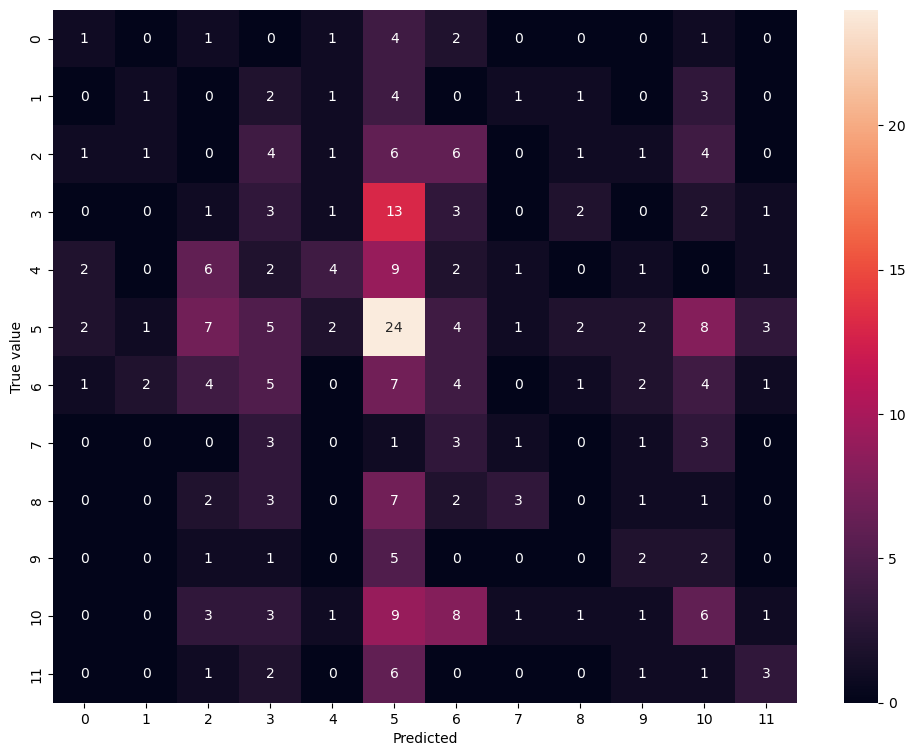

In [43]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,3) with 13 incorrect classifications represents how dpressive disers were mis classes often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [44]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.14      0.10      0.12        10
           2       0.20      0.08      0.11        13
           3       0.00      0.00      0.00        25
           4       0.09      0.12      0.10        26
           5       0.36      0.14      0.21        28
           6       0.25      0.39      0.31        61
           7       0.12      0.13      0.12        31
           8       0.12      0.08      0.10        12
           9       0.00      0.00      0.00        19
          10       0.17      0.18      0.17        11
          11       0.17      0.18      0.17        34
          12       0.30      0.21      0.25        14

    accuracy                           0.17       284
   macro avg       0.16      0.13      0.14       284
weighted avg       0.17      0.17      0.16       284



In [45]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html